In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from statscal import calc_vif
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(return_X_y=True,as_frame=True)
cancer

df = cancer[0]

In [3]:
df['category'] = cancer[1]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
df.shape, X.shape

((569, 31), (569, 30))

In [23]:

model = keras.Sequential([
            keras.layers.Dense(25, input_shape=(30,), activation='relu'),
            #keras.layers.Dense(10 ,activation='relu'),
            keras.layers.Dense(5 ,activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.6527
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7802
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8549
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8835
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.9143
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.9275
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.9363
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9407
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9516
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.9516
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9956
Epoch 83/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 84/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 85/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9956
Epoch 86/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9956
Epoch 87/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 88/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 89/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9956
Epoch 90/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9978
Epoch 91/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9978
Epoch 92/100


[[45  2]
 [ 0 67]]


Text(33.0, 0.5, 'Truth')

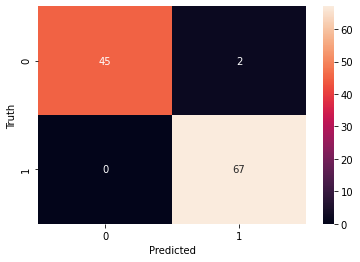

In [27]:
from sklearn.metrics import confusion_matrix
yp = model.predict(X_test)
y_pred=[]
for i in yp:
    if i<0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
#y_pred[:5]

cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')